# Restaurants in Kochi ranked based on user ratings.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler,RobustScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df=pd.read_csv('C:/Users/USER/DA/DATA SETS/restaurants_in_kochi_ratings_and_rank.csv')

In [3]:
df.head()

,rank,name,review,rated_excellent,rated_very_good,rated_average,rated_poor,rated_terrible,rating,price_range
0,1,Latest Recipe,790,713,54.0,5.0,4.0,3.0,5.0,"₹812 - ₹2,031"
1,2,Mosaic,"1,257","1,136",75.0,19.0,4.0,5.0,5.0,"₹1,000 - ₹1,500"
2,3,Masala,646,554,57.0,19.0,5.0,5.0,5.0,"₹406 - ₹1,625"
3,4,Zoka,729,639,55.0,14.0,4.0,6.0,5.0,"₹750 - ₹15,000"
4,5,Thai Soul,479,444,27.0,3.0,1.0,3.0,5.0,"₹1,100 - ₹1,300"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             1122 non-null   int64  
 1   name             1122 non-null   object 
 2   review           1121 non-null   object 
 3   rated_excellent  982 non-null    object 
 4   rated_very_good  982 non-null    float64
 5   rated_average    982 non-null    float64
 6   rated_poor       982 non-null    float64
 7   rated_terrible   982 non-null    float64
 8   rating           982 non-null    float64
 9   price_range      246 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 87.8+ KB


In [5]:
df.shape

(1122, 10)

In [6]:
df['review'].unique()

array(['790', '1,257', '646', '729', '479', '808', '357', '205', '546',
       '533', '376', '664', '271', '77', '352', '279', '499', '491',
       '414', '331', '431', '781', '749', '510', '1,682', '478', '1,635',
       '186', '1,175', '281', '427', '311', '235', '194', '594', '298',
       '159', '154', '863', '536', '93', '66', '133', '434', '170', '333',
       '148', '227', '628', '114', '123', '65', '46', '256', '67', '181',
       '97', '201', '96', '255', '268', '54', '167', '59', '143', '138',
       '44', '36', '108', '53', '131', '102', '135', '86', '168', '132',
       '51', '368', '50', '49', '34', '79', '103', '73', '130', '58',
       '126', '64', '62', '47', '43', '116', '184', '18', '45', '33',
       '52', '25', '41', '61', '35', '120', '152', '94', '82', '28', '29',
       '111', '112', '21', '70', '26', '95', '32', '31', '13', '37', '42',
       '19', '14', '23', '38', '20', '78', '74', '166', '15', '22', '24',
       '27', '12', '48', '56', '10', '8', '39', '17', 

In [7]:
df.tail()

,rank,name,review,rated_excellent,rated_very_good,rated_average,rated_poor,rated_terrible,rating,price_range
1117,1118,Canvas Restaurant & Pizzeria,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1118,1119,Cafe Delaviz,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1119,1120,Cafe Sora,0,NaN,NaN,NaN,NaN,NaN,NaN,₹10 - ₹500
1120,1121,Honey Dew Bakery,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1121,1122,Food Barrel Restaurant,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

rank                 0
name                 0
review               1
rated_excellent    140
rated_very_good    140
rated_average      140
rated_poor         140
rated_terrible     140
rating             140
price_range        876
dtype: int64

In [9]:
df.isnull().mean()*100

rank                0.000000
name                0.000000
review              0.089127
rated_excellent    12.477718
rated_very_good    12.477718
rated_average      12.477718
rated_poor         12.477718
rated_terrible     12.477718
rating             12.477718
price_range        78.074866
dtype: float64

In [10]:
df.drop(columns='price_range',inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             1122 non-null   int64  
 1   name             1122 non-null   object 
 2   review           1121 non-null   object 
 3   rated_excellent  982 non-null    object 
 4   rated_very_good  982 non-null    float64
 5   rated_average    982 non-null    float64
 6   rated_poor       982 non-null    float64
 7   rated_terrible   982 non-null    float64
 8   rating           982 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 79.0+ KB


In [12]:
df=df.dropna()

In [13]:
df.isnull().sum()

rank               0
name               0
review             0
rated_excellent    0
rated_very_good    0
rated_average      0
rated_poor         0
rated_terrible     0
rating             0
dtype: int64

In [14]:
df.shape

(981, 9)

In [15]:

df['review'].unique()

array(['790', '1,257', '646', '729', '479', '808', '357', '205', '546',
       '533', '376', '664', '271', '77', '352', '279', '499', '491',
       '414', '331', '431', '781', '749', '510', '1,682', '478', '1,635',
       '186', '1,175', '281', '427', '311', '235', '194', '594', '298',
       '159', '154', '863', '536', '93', '66', '133', '434', '170', '333',
       '148', '227', '628', '114', '123', '65', '46', '256', '67', '181',
       '97', '201', '96', '255', '268', '54', '167', '59', '143', '138',
       '44', '36', '108', '53', '131', '102', '135', '86', '168', '132',
       '51', '368', '50', '49', '34', '79', '103', '73', '130', '58',
       '126', '64', '62', '47', '43', '116', '184', '18', '45', '33',
       '52', '25', '41', '61', '35', '120', '152', '94', '82', '28', '29',
       '111', '112', '21', '70', '26', '95', '32', '31', '13', '37', '42',
       '19', '14', '23', '38', '20', '78', '74', '166', '15', '22', '24',
       '27', '12', '48', '56', '10', '8', '39', '17', 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 981
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             981 non-null    int64  
 1   name             981 non-null    object 
 2   review           981 non-null    object 
 3   rated_excellent  981 non-null    object 
 4   rated_very_good  981 non-null    float64
 5   rated_average    981 non-null    float64
 6   rated_poor       981 non-null    float64
 7   rated_terrible   981 non-null    float64
 8   rating           981 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 76.6+ KB


In [17]:
df['rated_excellent'].unique()

array(['713', '1,136', '554', '639', '444', '690', '328', '182', '513',
       '462', '329', '580', '229', '72', '216', '201', '318', '315',
       '266', '224', '250', '370', '418', '267', '846', '230', '749',
       '100', '570', '127', '142', '169', '125', '128', '245', '143',
       '84', '99', '363', '211', '82', '58', '77', '148', '90', '116',
       '79', '114', '213', '55', '86', '50', '42', '138', '53', '51',
       '88', '41', '89', '66', '40', '38', '52', '30', '32', '35', '47',
       '54', '64', '78', '36', '25', '27', '43', '46', '24', '20', '49',
       '44', '23', '28', '31', '33', '34', '18', '16', '29', '14', '22',
       '19', '21', '15', '26', '13', '12', '9', '6', '17', '7', '10', '8',
       '5', '11', '3', '0', '4', '2', '1'], dtype=object)

In [18]:
df

,rank,name,review,rated_excellent,rated_very_good,rated_average,rated_poor,rated_terrible,rating
0,1,Latest Recipe,790,713,54.0,5.0,4.0,3.0,5.0
1,2,Mosaic,"1,257","1,136",75.0,19.0,4.0,5.0,5.0
2,3,Masala,646,554,57.0,19.0,5.0,5.0,5.0
3,4,Zoka,729,639,55.0,14.0,4.0,6.0,5.0
4,5,Thai Soul,479,444,27.0,3.0,1.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...
977,978,Thara Restaurant,2,0,0.0,1.0,0.0,1.0,2.0
978,979,Bake My Day Palluruthy,1,0,0.0,0.0,0.0,1.0,1.0
979,980,Bab arabia,3,0,0.0,2.0,0.0,1.0,2.5
980,981,Hotel Harsh Dhaba Restaurant,2,0,0.0,1.0,0.0,1.0,2.0


In [19]:
df['rated_excellent'] = df['rated_excellent'].str.replace(',', '')

In [20]:
df["review"]= df["review"].str.replace(',','')

In [21]:
df

,rank,name,review,rated_excellent,rated_very_good,rated_average,rated_poor,rated_terrible,rating
0,1,Latest Recipe,790,713,54.0,5.0,4.0,3.0,5.0
1,2,Mosaic,1257,1136,75.0,19.0,4.0,5.0,5.0
2,3,Masala,646,554,57.0,19.0,5.0,5.0,5.0
3,4,Zoka,729,639,55.0,14.0,4.0,6.0,5.0
4,5,Thai Soul,479,444,27.0,3.0,1.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...
977,978,Thara Restaurant,2,0,0.0,1.0,0.0,1.0,2.0
978,979,Bake My Day Palluruthy,1,0,0.0,0.0,0.0,1.0,1.0
979,980,Bab arabia,3,0,0.0,2.0,0.0,1.0,2.5
980,981,Hotel Harsh Dhaba Restaurant,2,0,0.0,1.0,0.0,1.0,2.0


In [22]:
df['rated_excellent']=df['rated_excellent'].astype('int64')
df['review']=df['review'].astype('int64')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 981
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             981 non-null    int64  
 1   name             981 non-null    object 
 2   review           981 non-null    int64  
 3   rated_excellent  981 non-null    int64  
 4   rated_very_good  981 non-null    float64
 5   rated_average    981 non-null    float64
 6   rated_poor       981 non-null    float64
 7   rated_terrible   981 non-null    float64
 8   rating           981 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 76.6+ KB


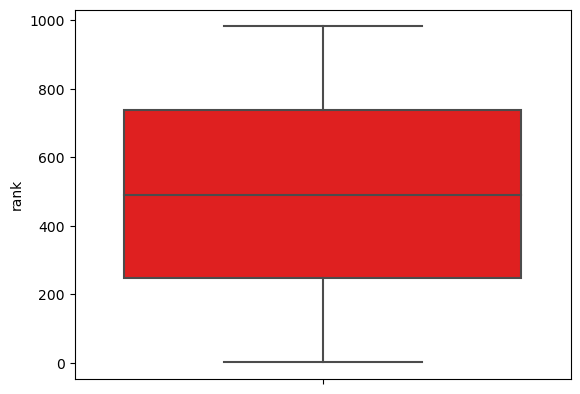

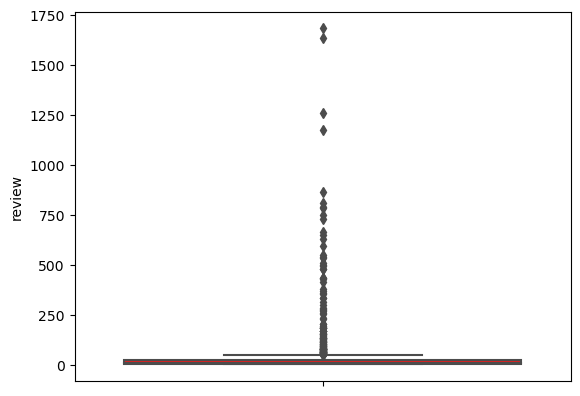

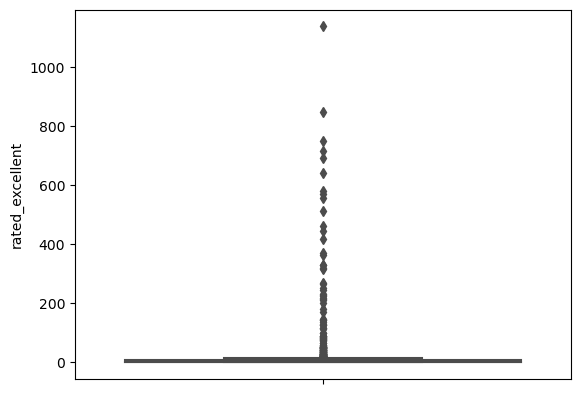

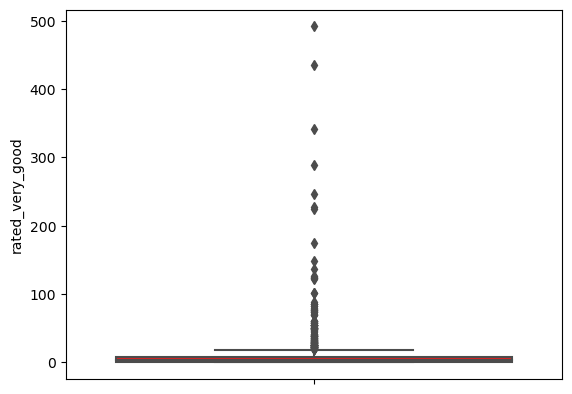

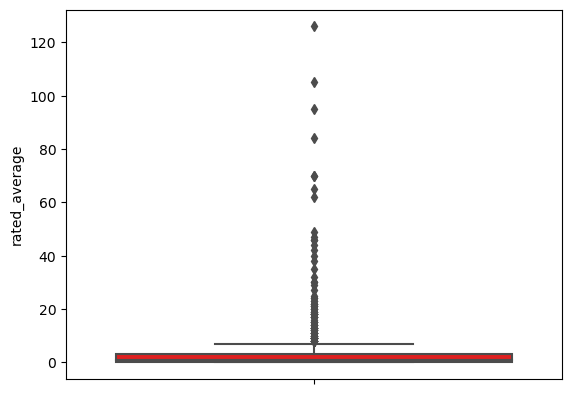

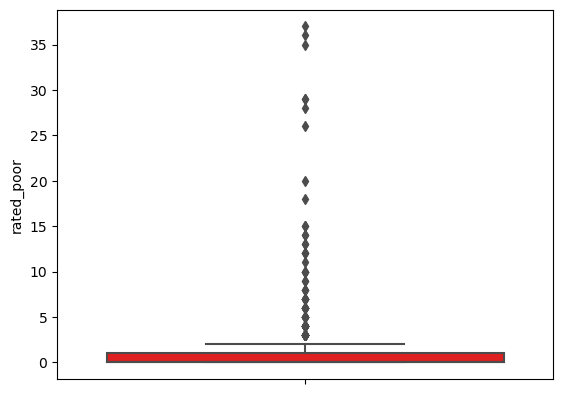

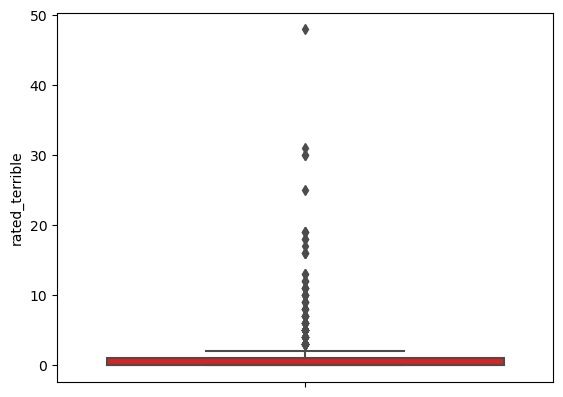

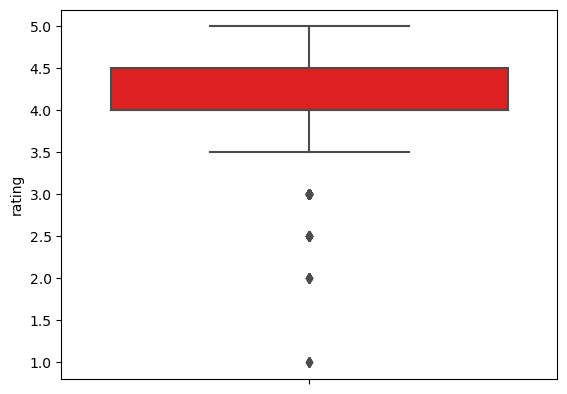

In [24]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color="red")
        plt.show()

In [25]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL


for column in df.columns:
    if df[column].dtype != "object":
        UL, LL = outlier_limit(df[column])
        df[column] = np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

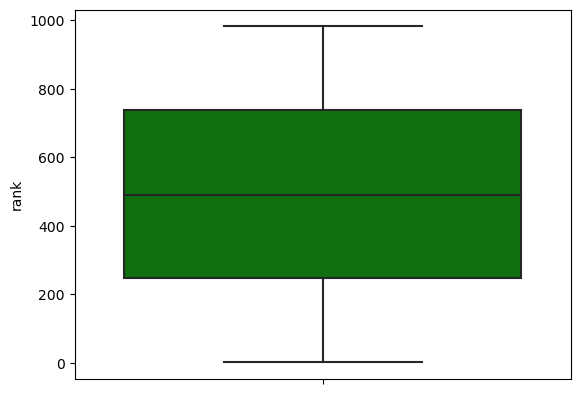

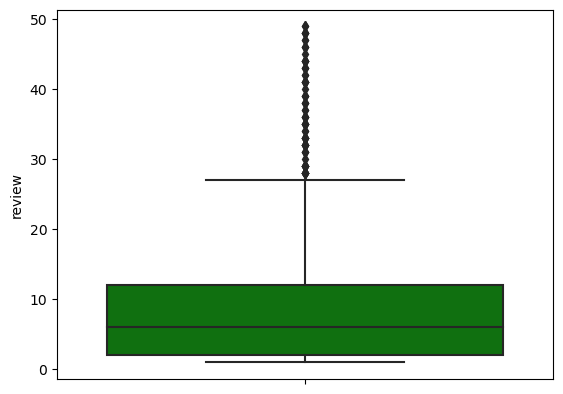

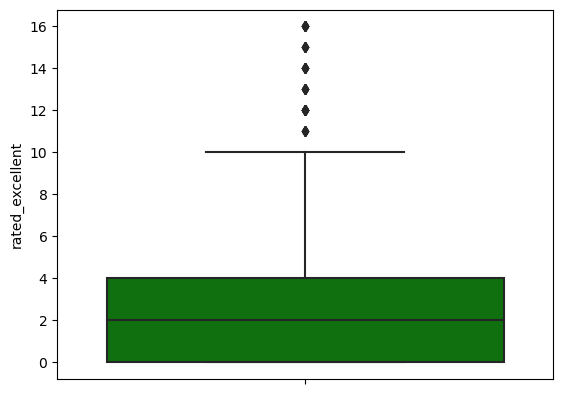

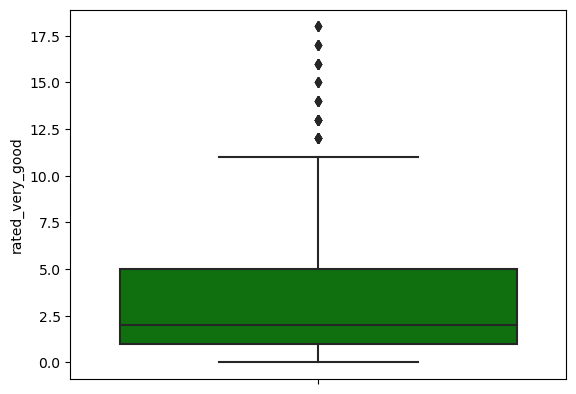

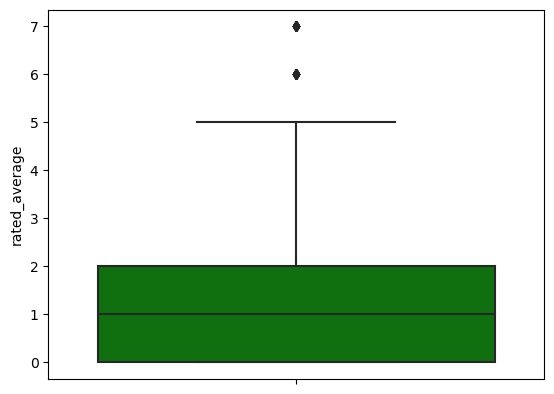

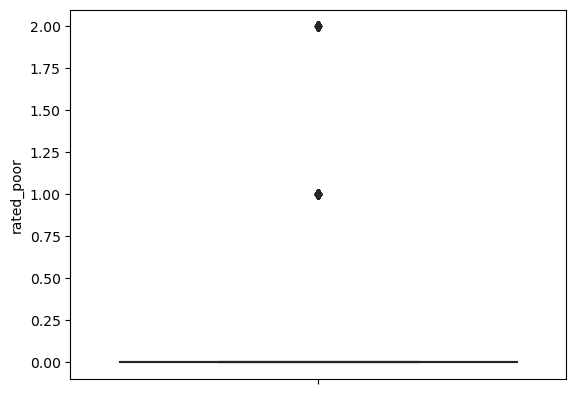

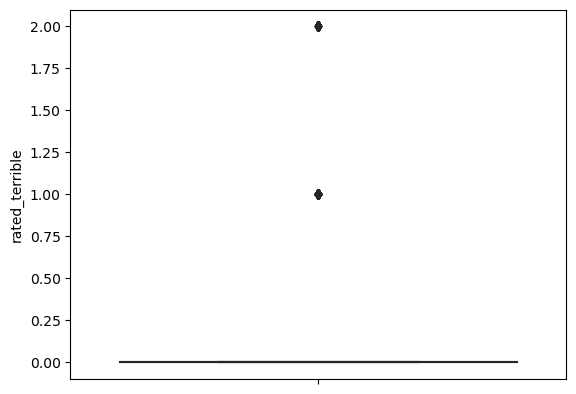

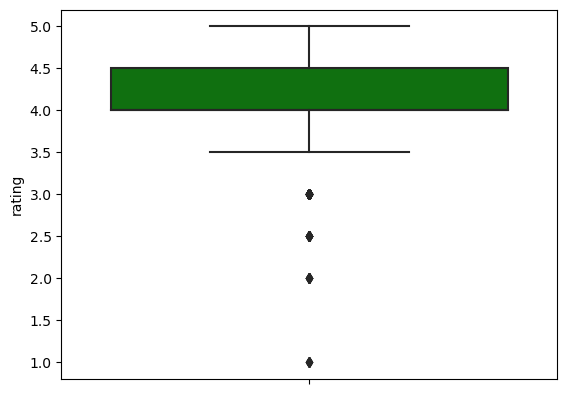

In [26]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color="g")
        plt.show()

In [27]:
df.isnull().sum()

rank                 0
name                 0
review             128
rated_excellent    139
rated_very_good    126
rated_average      105
rated_poor         100
rated_terrible     125
rating               0
dtype: int64

In [28]:
df=df.dropna()

In [29]:
df.isnull().sum()

rank               0
name               0
review             0
rated_excellent    0
rated_very_good    0
rated_average      0
rated_poor         0
rated_terrible     0
rating             0
dtype: int64

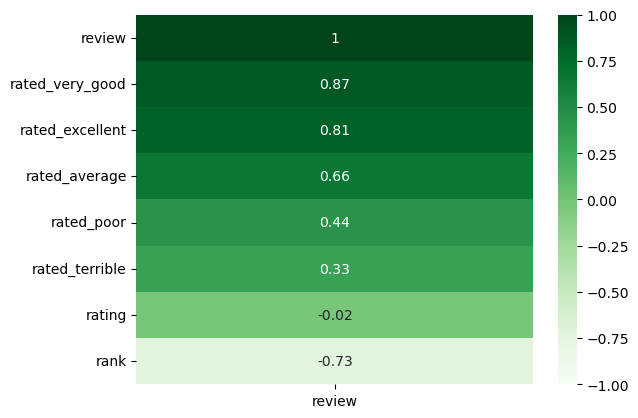

In [30]:
sns.heatmap(df.corr()[["review"]].sort_values(by="review", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Greens");

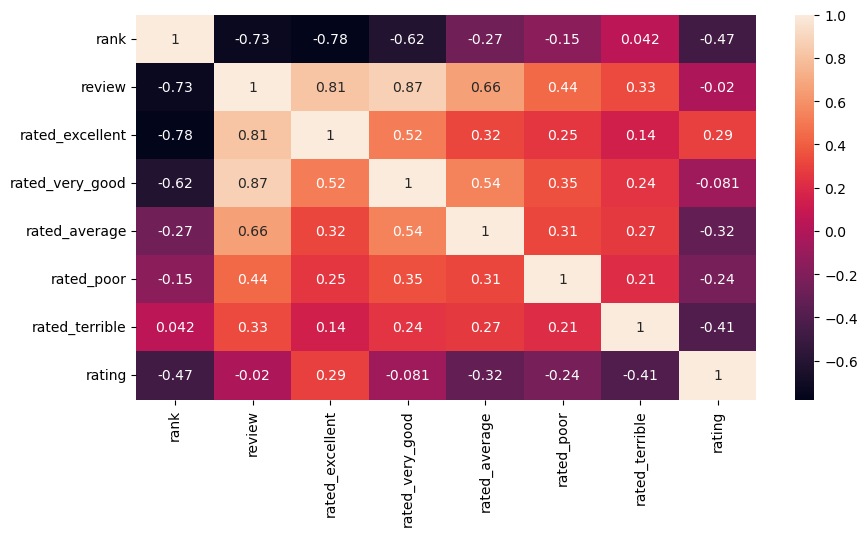

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 105 to 980
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             763 non-null    float64
 1   name             763 non-null    object 
 2   review           763 non-null    float64
 3   rated_excellent  763 non-null    float64
 4   rated_very_good  763 non-null    float64
 5   rated_average    763 non-null    float64
 6   rated_poor       763 non-null    float64
 7   rated_terrible   763 non-null    float64
 8   rating           763 non-null    float64
dtypes: float64(8), object(1)
memory usage: 59.6+ KB


In [33]:
x=df[["rated_average","rated_very_good","rated_excellent","rated_poor"]].values
y=df[["review"]].values

In [34]:
rs=RobustScaler()

In [35]:
x=rs.fit_transform(x)

In [36]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor()
}

In [37]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  0.7287244246696138
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  2.1033129727132325
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  0.7280150486781525
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  1.4814186979406296
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  1.1371675295958146
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  2.4212417824617596
**********************************************

In [38]:
rd=Ridge()

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [40]:
rd.fit(x_train, y_train)

Ridge()

In [41]:
print("model trained with {}".format(rd))
training_score = rd.score(x_train, y_train)*100
testing_score = rd.score(x_test, y_test)*100
score = r2_score(y_test, rd.predict(x_test))*100
mae = mean_absolute_error(y_test, rd.predict(x_test))
mse = mean_squared_error(y_test, rd.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with Ridge()
r2score:  98.75603333674493
training_score:  98.72947887151044
testing_score:  98.75603333674493
mae:  0.522923173551944
mse:  0.5799534237586956
rmse_test:  0.7615467311719588


In [42]:
y_pred = rd.predict(x)

In [43]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,34.0,30.785283
1,25.0,26.834615
2,35.0,31.053393
3,28.0,27.580745
4,29.0,30.666684
...,...,...
758,3.0,2.176211
759,2.0,1.123387
760,1.0,0.099577
761,3.0,2.147198


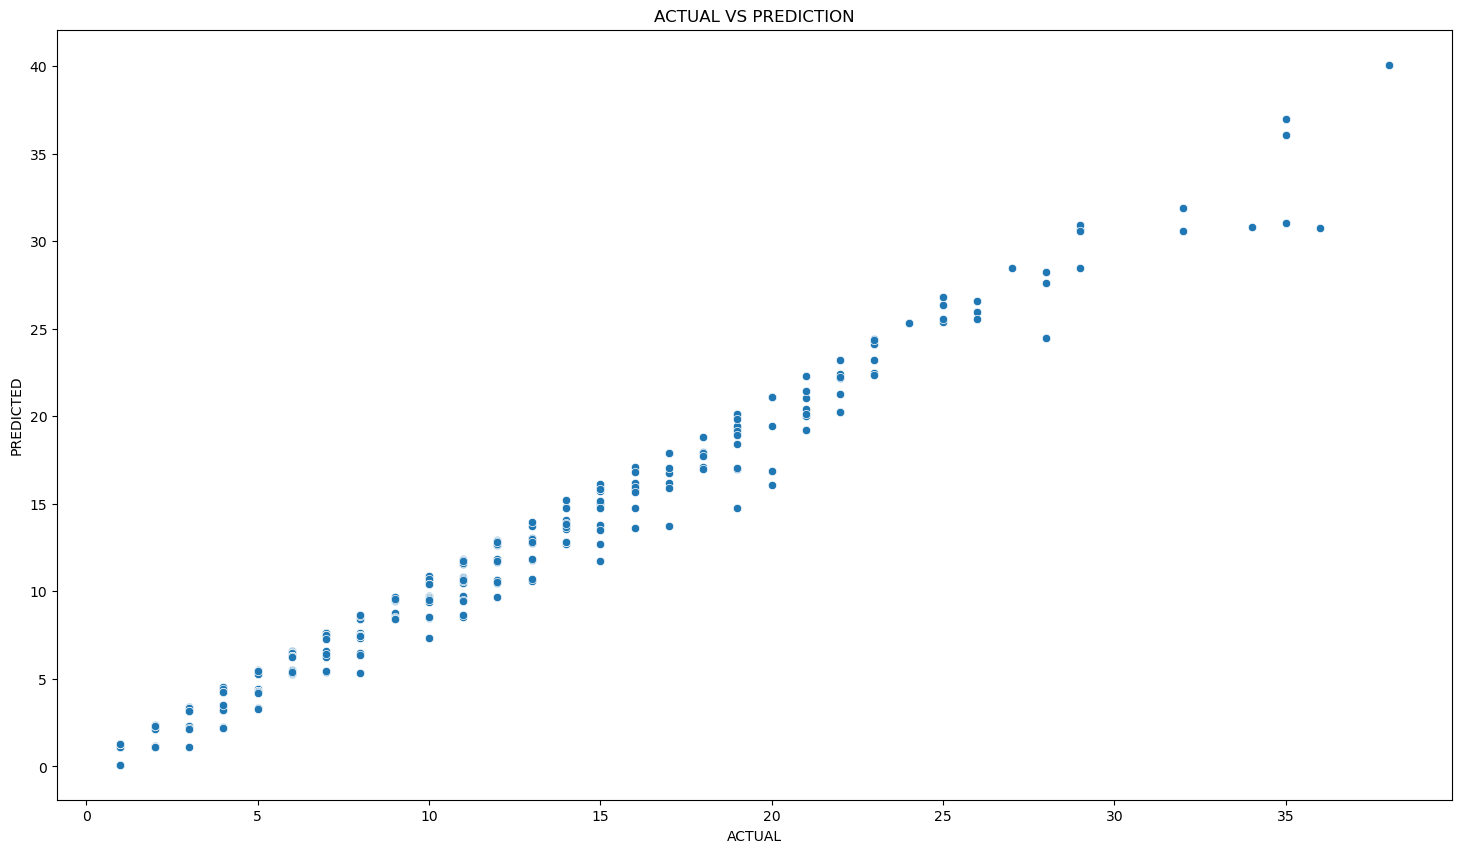

In [44]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()

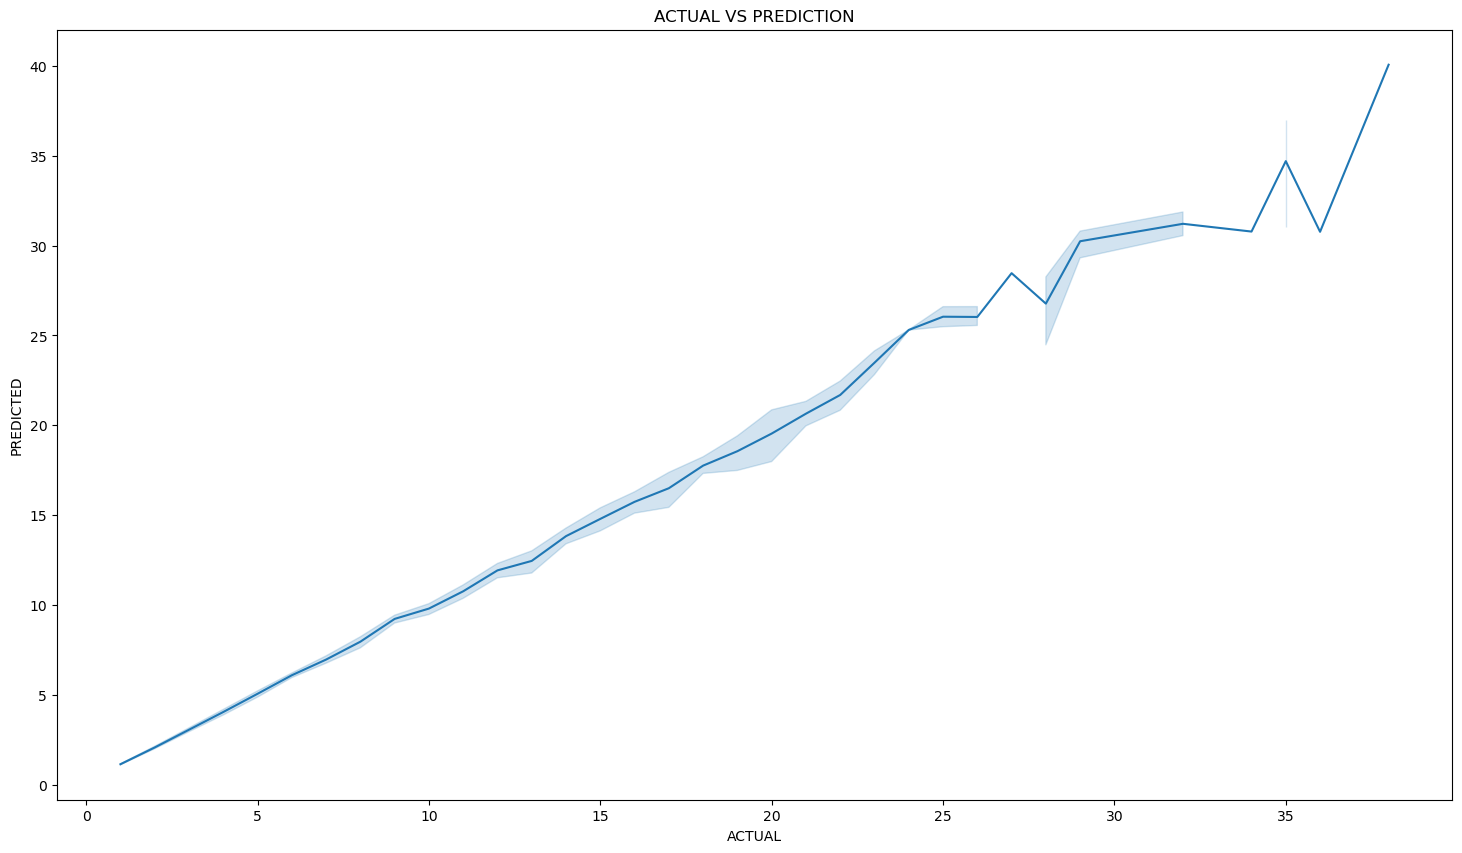

In [45]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()